# Assignment 3(A): Applying K-means and Hierarchical Clustering Algorithms to Grouping Automobile Loan Applications

### Acknowledgment

You are required to acknowledge the following statement by entering your full name, SID, and date below:

"By continuing to work on or submit this deliverable, I acknowledge that my submission is entirely my independent original work done exclusively for this assessment item. I agree to: 

* Submit only my independent original work
* Not share answers and content of this assessment with others
* Report suspected violations to the instructor

Furthermore, I acknowledge that I have not engaged and will not engage in any activities that dishonestly improve my results or dishonestly improve/hurt the results of others, and that I abide to all academic honor codes set by the University."

**Your full name:**  
Pang Fong Chun  
**Your SID:**  
3035281299  
**Date:**  
14 Jul 2022

## 1. Introduction <a id='section_1'></a>
In this part of the assignment, you will implement the K-Means clustering and hierarchical clustering algorithms, and use the models learned by these algorithms to cluster automobile loan applications. You are required to complete the lines between __START YOUR CODE HERE__ and __END YOUR CODE HERE__ (if applicable) and to execute each cell. Within each coding block, you are required to enter your code to replace `None` after the `=` sign (except otherwise stated). You are not allowed to use other libraries or files than those provided in this assignment. When entering your code, you should not change the names of variables, constants, and functions already listed.  

**Contents**

* [1. Introduction](#section_1)
* [2. Auto Loan Dataset](#section_2)
    * [2.1. Data Description](#section_21)
    * [2.2. Data Loading](#section_22)
    * [2.3. Data visualization](#section_23)
    * [2.4. Data Processing](#section_24)
* [3. K-Means Algorithm](#section_3)
    * [3.1. Centroid Initialization](#section_31)
    * [3.2. Clustering](#section_32)
    * [3.3. Centroid Calculation](#section_33)
    * [3.4. Centroid Variation Evaluation](#section_34)
    * [3.5. Cost Computation](#section_35)
    * [3.6. K-Means Evaluation](#section_36)
        * [3.6.1. Parameter Selection](#section_361)
        * [3.6.2. Elbow Parameter Selection](#section_362)
* [4. Hierarchical Clustering](#section_4)
    * [4.1. Clustering Node](#section_41) 
    * [4.2. Single Linkage](#section_42)
    * [4.3. Hierarchical Structure Generation](#section_43)
    * [4.4. Performance Testing](#section_44) 
    * [4.5. Dendrogram](#section_45) 
* [5. Marking Scheme and Submission](#section_5)
* [6. Summary](#section_6)

You need to execute the following block to import all libraries required for this assignment.

In [1]:
# Scientific and vector computation for python
import numpy as np

# Data analysis and manipulation tool for python
import pandas as pd

# Plotting library
import matplotlib.pyplot as plt 

# sckit-learn libraries
from sklearn.preprocessing import StandardScaler

# dendrogram visualization in scipy library
from scipy.cluster.hierarchy import dendrogram

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## 2. Automobile Loan Dataset <a id='section_2'></a>
### 2.1. Data Description <a id='section_21'></a>
The dataset includes 3,061 records of automobile (used cars) loan applications processed by a bank. Each record is described by 27 features as listed below (an additional unnamed ID (first column) is not listed). The text file named `raw_classification_data.csv` stores each record as one row having the feature values separated by commas.

| Feature | Description 
|:----:|:- 
| ModifiedCreditScore | Greater of the Credit score and Co-Credit Score.
| ModifiedBankruptcyScore | Greater of the Bankruptcy score and Co-Bankruptcy Score.
| EmployedMonths | Stated number of months that the applicant has been employed with their current employer.
| TotalMonthlyIncome | Sum of the applicants and the co-applicants monthly income.
| PrimeMonthlyLiability | Stated non-rent liabilities of applicant.
| PrimeMonthlyRent | Applicant's stated monthly housing expense.
| TotalMonthlyDebtBeforeLoan | Sum of applicant and co-applicants housing payments and liabilities.
| VehicleYear | Year of the vehicle the applicant is looking to purchase.
| VehicleMileage | Number of miles on the vehicle the applicant is looking to purchase.
| TotalVehicleValue | Amount the vehicle is being sold for.
| AmountRequested | Amount the applicant is requesting to borrow.
| DownPayment | Amount of money the applicant is paying upfront toward the vehicle loan.
| Loanterm | Number of months applicant has to pay loan off.
| OccupancyDuration | Stated number of months the applicant has been in their current residence at the time of the application.
| EstimatedMonthlyPayment | Estimated monthly payment based on loan amount, interest rate, and loan term.
| NumberOfOpenRevolvingAccounts | Count of revolving accounts that appear on the applicant's credit report.
| LTV | Vehicle's loan to value ratio.
| DTI | Applicant's debt to income ratio based on credit report and loan type. 
| Source | Identifies channel from which application was received.
| EmploymentStatus | Indicates if the applicant was employed at the time application was submitted.
| VehicleMake | Make of the vehicle the applicant is looking to purchase.
| isNewVehicle | Indicates if the vehicle the applicant is looking to purchase is new or used.
| OccupancyStatus | Stated occupancy status of the applicant at the time of the application.
| RequestType | Type of vehicle loan requested by the applicant (Refinance, lease buyout, etc.)
| MemberIndicator | Indicates if applicant was a bank member before applying for loan
| CoApplicantIndicator | Indicates whether or not a co-applicant is present on the application
| LoanStatus | Indicates whether loan was approved or denied

### 2.2. Data Loading <a id='section_22'></a>
In this section, you use the pandas functions `read_csv()` to load the dataset, `info()` to generate a summary, `drop()` to drop the first unnamed feature column. You can optionally use `head()` to display first several records. 

In [2]:
# Load Data
raw_classification_data = pd.read_csv("raw_classification_data.csv")
raw_classification_data.drop('Unnamed: 0', axis=1, inplace=True)
raw_classification_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3061 entries, 0 to 3060
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   LoanStatus                     3061 non-null   object 
 1   Source                         3061 non-null   object 
 2   ModifiedCreditScore            3061 non-null   int64  
 3   ModifiedBankruptcyScore        3061 non-null   int64  
 4   EmploymentStatus               3061 non-null   object 
 5   EmployedMonths                 3061 non-null   int64  
 6   TotalMonthlyIncome             3061 non-null   float64
 7   PrimeMonthlyLiability          3061 non-null   float64
 8   PrimeMonthlyRent               3061 non-null   float64
 9   TotalMonthlyDebtBeforeLoan     3061 non-null   float64
 10  VehicleYear                    3061 non-null   int64  
 11  VehicleMake                    3061 non-null   object 
 12  VehicleMileage                 3061 non-null   f

### 2.3. Data Visualization <a id='section_23'></a>
You can visualize the distribution of each feature by executing the following code block. All numeric (continuous) features are visualized by blue bars, whereas all categorical features are visualized by red bars.

Attribute Number: 27


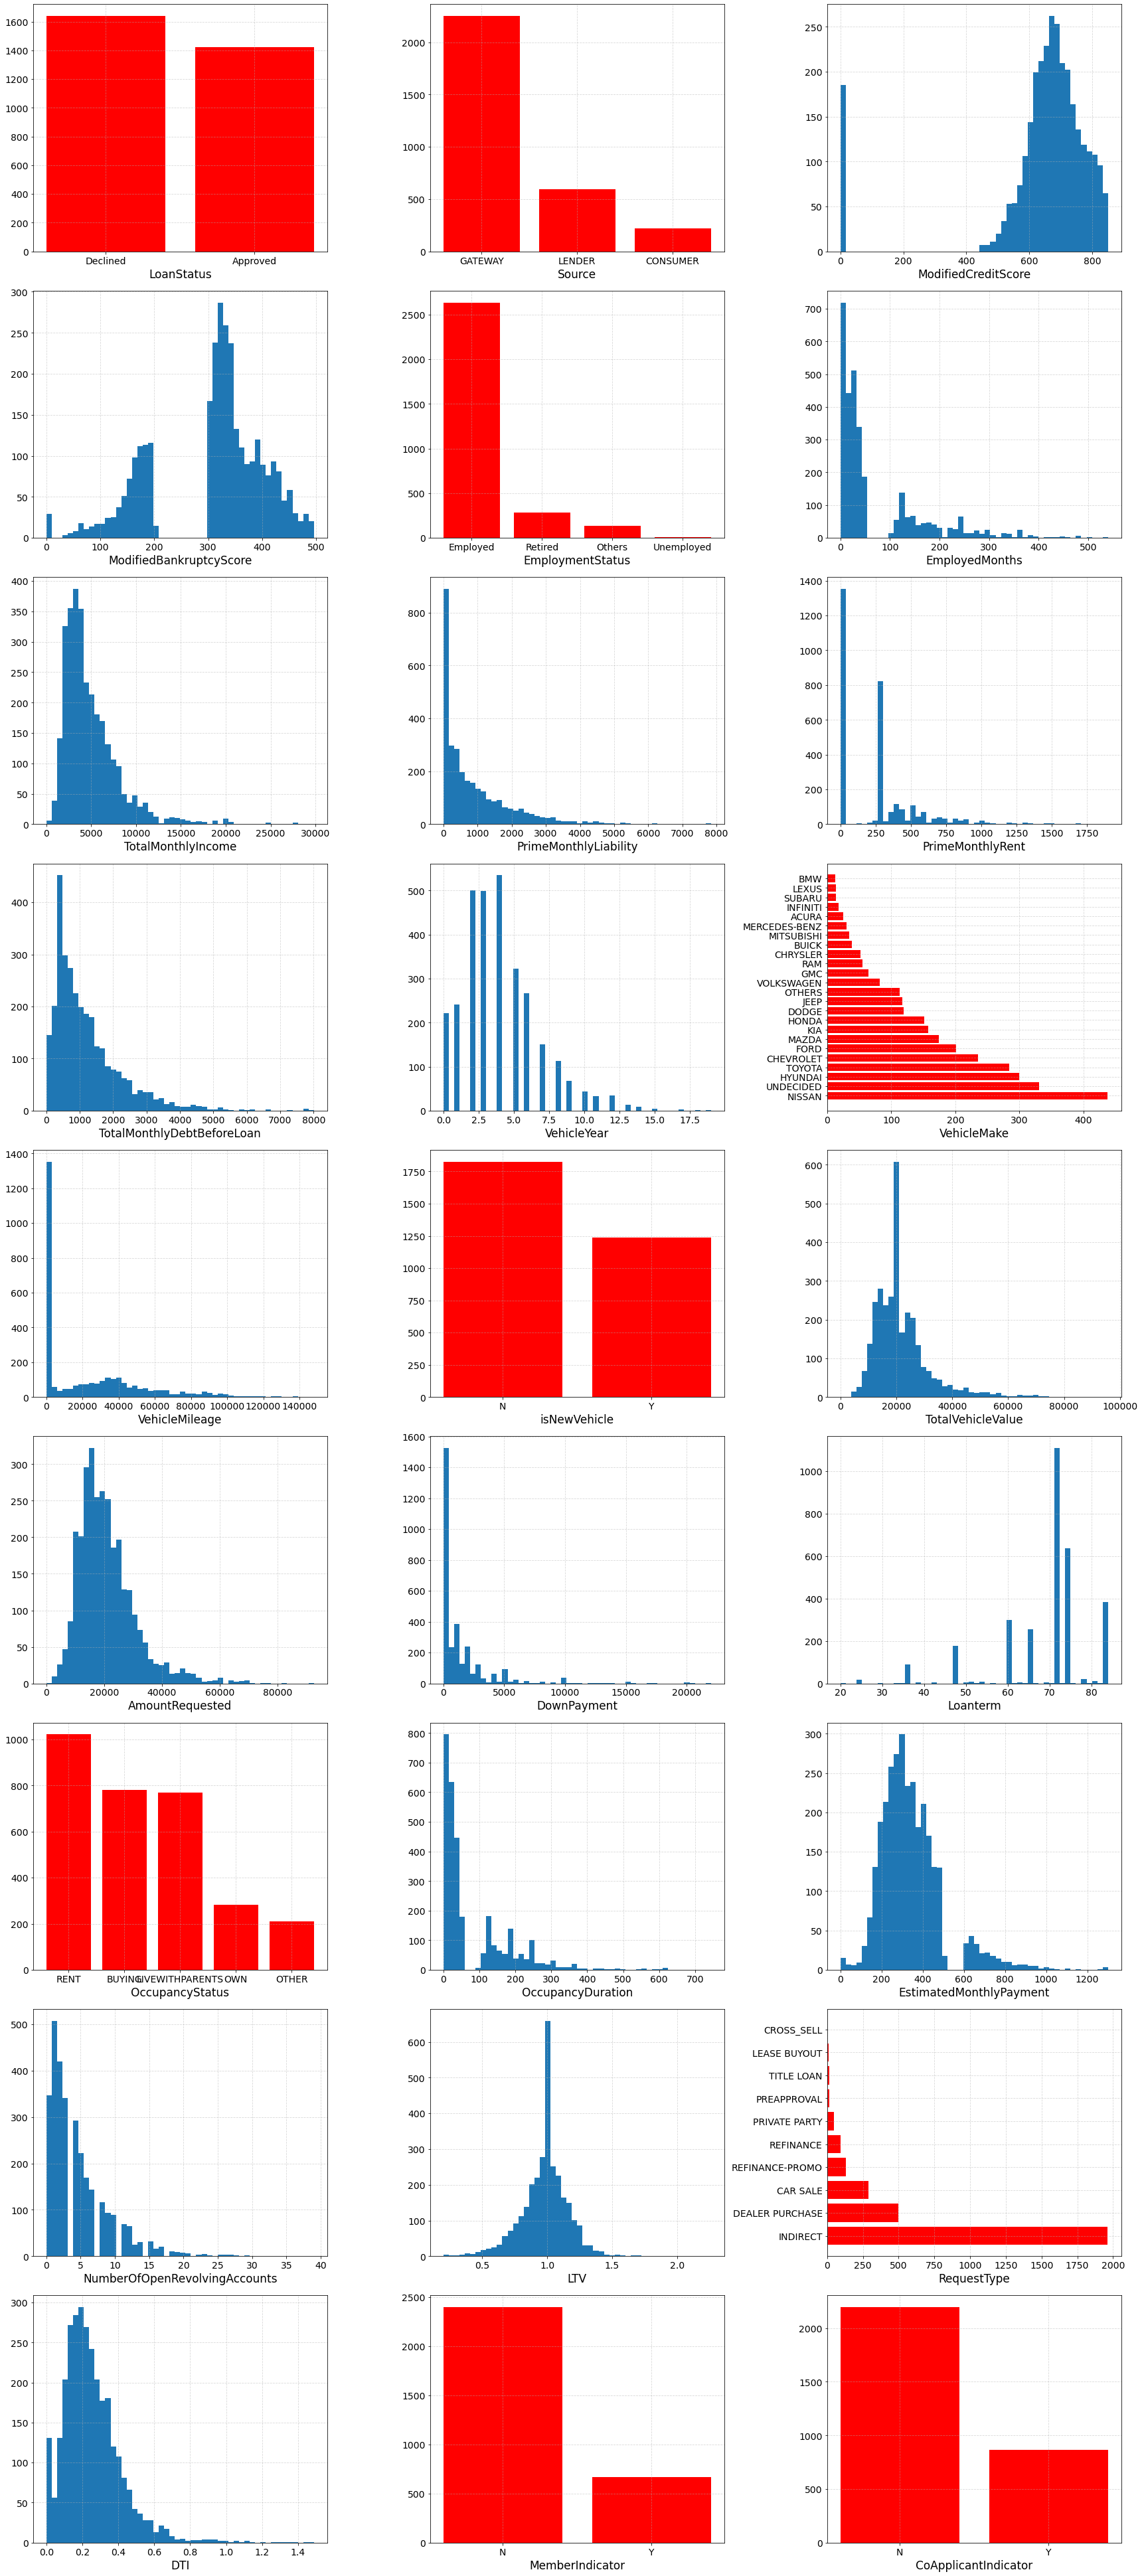

In [3]:
attribute_number = len(raw_classification_data.columns)
print("Attribute Number: {}".format(attribute_number))

# subplots 
fig = plt.figure(figsize=(24, 54))
ax = fig.subplots(attribute_number//3,3)
# iterations
for num, title in enumerate(raw_classification_data.columns):
    idx = num//3 # divided with no remainder
    idy = num%3  # remainder 
    if raw_classification_data[title].dtype in ['object']:
        value_count_dict = raw_classification_data[title].value_counts().to_dict()
        keys = list(value_count_dict.keys())
        values = list(value_count_dict.values())
        if len(raw_classification_data[title].unique().tolist()) < 8:
            ax[idx, idy].bar(keys, values, color='r')
        else:
            ax[idx, idy].barh(keys, values, color='r')
    else:
        ax[idx, idy].hist(raw_classification_data[title].values, bins=50);
    
    # set title with attribute
    ax[idx, idy].set_xlabel(title, fontsize=17)
    # set grid width
    ax[idx, idy].grid(linestyle='--', alpha=0.5)
    # font size of ticks
    ax[idx, idy].tick_params(labelsize=14)
plt.tight_layout()

### 2.4. Data Pre-processing <a id='section_24'></a>
Before running a clustering algorithm, you will pre-process the data as follows: 

1. extract from the whole dataset only continuous features (categorical features will not be used in clustering here)
2. normalize the continuous features with [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) (that implements Z-score scaling)

In [4]:
scaler = StandardScaler()
# extract numerical and categorical features
continuous_data = raw_classification_data.select_dtypes(exclude='object')

# feature scaling
data = scaler.fit_transform(continuous_data)

## 3. K-Means Algorithm <a id='section_3'></a>


The K-means algorithm is an iterative procedure to identify naturally occurring groups among a set of data instances. It requires an integer $m > K > 0$ to be specified first. Then $K$ centroids are initialized. Next, cluster assignment and centroid updating is run iteratively until convergence. 

### 3.1. Centroid Initialization <a id='section_31'></a>

**Task 1:** <a id='task_1'></a> 

To randomly sample the dataset to identify $k$ initial centroids, you will

1. generate a list of data indices based on the number of data items (i.e., "data_num"). Please use the function `range()` and transform the data into "List" data type with function `list()`. The result should be saved into "data_index_list".
2. generate `k` random numbers with function [`np.random.choice()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html), save them in "centroid_indices". Please understand how to use the inputs "size=", and "replace=" of this function. Because a data item in the dataset cannot be selected more than once as the centroid, therefore, please choose the correct value of "repalce=" (`True` or `False`). (1 line)
3. extract corresponding data items with the selected "centroid_indices" (1 lines)

In [44]:
def sample_centroid(data, k):
    '''
        - data: continuous features
        - k:    number of centroids 
    '''
    # number of data items 
    data_num, _ = data.shape
    
    # task 1:
    # ====================== START YOUR CODE HERE ======================
    data_index_list = list(range(data_num))
    centroid_indices = np.random.choice(data_index_list, k, replace=False)
    centroids = np.array([data[i] for i in centroid_indices])
    # ====================== END YOUR CODE HERE ========================
    
    return centroids

**[Test Block 1]:** Test code for function `sample_centroid()`.

In [45]:
# sampled data
centroid_num = 7
sample_num = 30
sample_data = data[:sample_num]

# set constant seed for consistent answer
np.random.seed(5)
centroids = sample_centroid(sample_data, centroid_num)
# you can use function "numpy.allclose" to compare two floats with small differences.
if np.allclose(centroids[0][0], -0.76584123) and np.allclose(centroids[-1][-1], 0.27494617):
    print('Your answers are correct!')
else:
    print('Your answers are not correct, please correct the funtion codes.')

Your answers are correct!


### 3.2. Clustering <a id='section_32'></a>
**Task 2:** <a id='task_2'></a> 

Given a list of centroids, the next task is to separate the whole dataset into several groups with respect to different centroids. The assignment of labels depends on the distance between the data item and the centroid. In detail:

##### Task 2(A):
1. compute the distances between the data features and centroids with their Euclidean distance. You can use the function [`np.linalg.norm()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) to get the distance values. Save the reuslt in the list "dists" with correct index "idx" (1 line)
##### Task 2(B):
2. get the index of value with the minimal distance from "dists" with the function [`np.argmin()`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html). Save the result in value "nearest_idx". (1 line)
3. save the obtained minimum index in the list "data_group_labels" with current index. (please select the correct index between "idx" and "data_idx") (1 line)

In [62]:
def kmeans_cluster(data, centroids):
    '''
        - data: continuous featrues
        - centroids: list of centroids 
    '''
    data_num = data.shape[0]
    centroid_num = centroids.shape[0]
    
    # iterations for group assignment
    data_group_labels = np.zeros((data_num,))
    for data_idx, data_item in enumerate(data):
        dists = np.zeros((centroid_num,))
        # compute distances to centroids
        for idx, centroid in enumerate(centroids):
            # task 2(A):
            # ====================== START YOUR CODE HERE ======================
            dists[idx] = np.linalg.norm(data_item-centroid)
            # ====================== END YOUR CODE HERE ========================
        # task 2(B):
        # ====================== START YOUR CODE HERE ======================
        nearest_idx = np.argmin(dists)
        data_group_labels[data_idx] = nearest_idx
        # ====================== END YOUR CODE HERE ========================
    
    return data_group_labels

**[Test Block 2]:** Test code for function `kmeans_cluster()`.

In [63]:
# sampled data
centroid_num = 5
sample_centroids = centroids[:centroid_num]
sample_data = data[10:20]

# test implemented code
group_labels = kmeans_cluster(sample_data, sample_centroids)
print("Group labels: {}".format(group_labels))

# you can use function "numpy.allclose" to compare two floats with small differences.
if np.allclose(group_labels, [0., 0., 0., 0., 4., 0., 2., 1., 4., 0.]):
    print('Your answers are correct!')
else:
    print('Your answers are not correct, please correct the funtion codes.')

Group labels: [0. 0. 0. 0. 4. 0. 2. 1. 4. 0.]
Your answers are correct!


### 3.3. Centroid Calculation <a id='section_34'></a>

**Task 3:** <a id='task_3'></a>

After the group assignment of data items, the next task it to compute the new centroid of data in each group. With respect to each centroid, you should:

1. extract the corresponding data items with indexing by condition-statement formulation. For instance, you can use if you have `a` and `b` (two `np.ndarray`), `a[b==1]` can be used to extract the values in `a` of which index in `b` is $1$. Save the result in "subdata". (1 line)
2. compute the new centroid with `np.mean()`, please make sure that the parameter `axis=` of this function has a correct input (selected between "0" and "1"). Save the result in "centroid" (1 line)
3. save the centroid into "new_centroids" with correct index. (1 lines)

In [80]:
def compute_centroid(data, group_labels, k):
    """
        - data: continuous features
        - group_labels: labels of each data item in the dataset
        - k: number of centroids
    """
    # separate data
    feature_num = data.shape[1]
    
    new_centroids = np.zeros((k, feature_num))
    for centroid_idx in range(k):
        # task 3:
        # ====================== START YOUR CODE HERE ======================
        subdata = data[group_labels==centroid_idx]
        centroid = np.mean(subdata, axis=0)
        new_centroids[centroid_idx] = centroid
        # ====================== END YOUR CODE HERE ========================
    return new_centroids

**[Test Block 3]:** Test code for function `compute_centroid()`.

In [81]:
# sampled data
sample_data = data[:8]
sample_group_labels = np.array([0, 0, 1, 1, 0, 0, 1, 1])

# test implemented code
sample_centroids = compute_centroid(sample_data, sample_group_labels, 2)

# centroid output
print("New centroids: {}".format(sample_centroids))

# you can use function "numpy.allclose" to compare two floats with small differences.
if np.allclose(sample_centroids[0][0], [-7.90817623e-01]):
    print('Your answers are correct!')
else:
    print('Your answers are not correct, please correct the funtion codes.')

New centroids: [[-7.90817623e-01 -1.77847454e-01 -4.13316812e-01 -3.14299143e-01
   9.42429619e-01 -3.57789284e-01  8.27107467e-01  3.53145013e-01
  -3.19587845e-01  1.91053734e-01 -1.50381305e-01 -3.80039669e-01
   4.94827923e-01 -6.41987589e-01 -3.87092193e-01  8.80353163e-02
   1.62809372e-01  1.97391925e+00]
 [-1.28603637e-03  5.16611937e-01 -1.31491070e-03  1.09789023e-02
   1.76099413e-01  9.69198048e-02  1.67185306e-01  1.71773052e-01
   3.45338870e-01 -6.69656505e-01 -5.80769340e-01 -4.17388690e-02
   2.93984319e-01 -2.34351458e-01 -6.00724627e-01  3.35304701e-02
   4.58228879e-02  1.69626271e-01]]
Your answers are correct!


### 3.4. Centroid Variation Evaluation <a id='section_34'></a>

**Task 4:** <a id='task_4'></a>

This function is to compute the average sum of differences between current centroids and previous centroids. The difference is computed as the average of all distances between centroids. In each iteraction of centroid, you should:

1. get the previous and current centroid. Save them in "centroid" and "prev_centroid" with "idx", respectively. (2 lines)
2. compute the distances between current centroid and previous centroid with their Euclidean distance. Similarly, you can use the function `np.linalg.norm()` to get the distance value. Save the reuslt in "dist" (1 line)
3. add the value to the "difference" (1 line)

In [91]:
def compute_centroid_variation(centroids, previous_centroids):
    """
        - centroids: list of current centroid vectors
        - previous_centroids: list of previous centroid vectors
    """
    
    centroid_num = centroids.shape[0]
    difference = 0
    for idx in range(centroid_num):
        # task 4:
        # ====================== START YOUR CODE HERE ======================
        centroid = centroids[idx]
        prev_centroid = previous_centroids[idx]
        dist = np.linalg.norm(centroid-prev_centroid)
        difference += dist
        # ====================== END YOUR CODE HERE ========================
        
    difference /= centroid_num
    return difference

**[Test Block 4]:** Test code for function `compute_centroid_variation()`.

In [92]:
# sampled data
sample_centorids1 = data[:2]
sample_centorids2 = data[2:4]

# test implemented code
sample_difference = compute_centroid_variation(sample_centorids1, sample_centorids2)

# centroid difference output
print("Difference of centroids: {}".format(sample_difference))

# you can use function "numpy.allclose" to compare two floats with small differences.
if np.allclose(sample_difference, 4.774725533552958):
    print('Your answers are correct!')
else:
    print('Your answers are not correct, please correct the funtion codes.')

Difference of centroids: 4.774725533552958
Your answers are correct!


### 3.5. Cost Computation <a id='section_35'></a>

The formular of cost values to evaluate K-Means clustering is defined as follows:

$$\min_{c^{(i)}, \mu_k} J(c^{(1)},c^{(2)},\ldots,c^{(m)},\mu_1,\ldots,\mu_K)=\frac{1}{m} \sum\limits_{i=1}^m \left\lVert x^{(i)}-\mu_{c^{(i)}} \right\rVert ^2 \ . \tag{2}$$

**Task 5:** <a id='task_5'></a>

To evaluate the performance of clustering, the summation of distances between data and its corresponding centroid is computed. In each iteration of, you should:

1. extract the corresponding data with index "idx", save it in "data_item" (1 lines)
2. get the group label of this data item, save it in "label". Before assign your result to "label", please cast it to a "int" variable with fucntion `int()`. (1 line)
3. extract the corresponding centroid data from "centroids" with "label". (1 lines)
4. compute the squared distances between the features of data and centroids. You can first use the function `np.linalg.norm()`. Then do not forget to do square operation with operation "**" (for instance `3**2 = 9`) to get the cost value. Save the reuslt in "cost" (1 line)
5. add the value to the "total_cost" (1 line)

In [100]:
def compute_cost(data, group_labels, centroids):
    """
        - data: continuous features
        - group_labels: group_labels: labels of each data item in the dataset
        - centroids: list of centroid vectors
    """
    
    data_num, _ = data.shape
    total_cost = 0
    for idx in range(data_num):
        # task 5:
        # ====================== START YOUR CODE HERE ======================
        data_item = data[idx]
        label = int(group_labels[idx])
        centroid = centroids[label]
        cost = np.linalg.norm(data_item-centroid)**2
        total_cost += cost
        # ====================== END YOUR CODE HERE ========================

    total_cost /= data_num
    return total_cost

**[Test Block 5]:** Test code for function `compute_cost()`.

In [101]:
# sampled data
sample_data = data[:8]
sample_group_labels = np.array([0, 0, 1, 1, 0, 0, 1, 1])

# test implemented code
sample_centroids = compute_centroid(sample_data, sample_group_labels, 2)
sample_cost = compute_cost(sample_data, sample_group_labels, sample_centroids)

# cost output
print("Cost: {}".format(sample_cost))

# you can use function "numpy.allclose" to compare two floats with small differences.
if np.allclose(sample_cost, 14.819942599628883):
    print('Your answers are correct!')
else:
    print('Your answers are not correct, please correct the funtion codes.')

Cost: 14.819942599628883
Your answers are correct!


### 3.6. K-Means Evaluation <a id='section_36'></a>
#### 3.6.1. Performance Testing <a id='section_361'></a>
**Task 6:** <a id='task_6'></a>

##### Task 6(A)
In this part, you will test your implemented functions by the whole dataset. In detail, you should:

1. initialize the centroids with function `sample_centroid()` (1 line)
##### Task 6(B)
In each iteration:

2. set the group labels of data with function `kmeans_cluster()` (1 line)
3. compute the new centroids based on new assigned data groups with function `compute_centroid()` (1 line)
4. compute the distance difference between old and new centroids with function `compute_centroid_variation()` (1 line)
5. compute the cost of new centroid configuration with function `compute_cost()` (1 line)

In [106]:
# hyperparameter K 
K = 20
max_iter_counts = 200
threshold = 0.001

cost_value_list = list()
iter_num_list = list()

# task 6(A):
# ====================== START YOUR CODE HERE ======================
# initialize centroids
centroid_list = sample_centroid(data, K)
# ====================== END YOUR CODE HERE ========================
# K-means iterations
for idx in range(max_iter_counts):
    # task 6(B):
    # ====================== START YOUR CODE HERE ======================
    # assign data to centroid groups
    # compute new centroid
    # centroid change distance
    # cost value
    group_labels = kmeans_cluster(data, centroid_list)
    new_centroid_list = compute_centroid(data, group_labels, K)
    centroid_diff = compute_centroid_variation(centroid_list, new_centroid_list)
    cost_value = compute_cost(data, group_labels, new_centroid_list)
    # ====================== END YOUR CODE HERE ========================
    if idx % 5 == 0:
        print("Iteration: {}, Changes of Centroids: {}, Cost Value: {}".format(idx, centroid_diff, cost_value))
    cost_value_list.append(cost_value)
    iter_num_list.append(idx)
    centroid_list = new_centroid_list
    if centroid_diff < threshold:
        break

Iteration: 0, Changes of Centroids: 1.9338887324360268, Cost Value: 10.466596066317246
Iteration: 5, Changes of Centroids: 0.14287514990721828, Cost Value: 8.761396712923522
Iteration: 10, Changes of Centroids: 0.05915918752998128, Cost Value: 8.686234735260813
Iteration: 15, Changes of Centroids: 0.035156221773890106, Cost Value: 8.655616080386226
Iteration: 20, Changes of Centroids: 0.0411652056324026, Cost Value: 8.631431492977978
Iteration: 25, Changes of Centroids: 0.061373648909266, Cost Value: 8.603736589460764
Iteration: 30, Changes of Centroids: 0.02912855086858148, Cost Value: 8.583023169751351
Iteration: 35, Changes of Centroids: 0.03091285322339147, Cost Value: 8.572758362896915
Iteration: 40, Changes of Centroids: 0.017939335294459027, Cost Value: 8.559325438825722
Iteration: 45, Changes of Centroids: 0.004425091417150286, Cost Value: 8.557036610004303
Iteration: 50, Changes of Centroids: 0.001305458268387593, Cost Value: 8.555543280043155


After the maximal iteration number is arrived or the learning is converged, the changes of cost values with respect to the number of iterations are shown in the following figures:

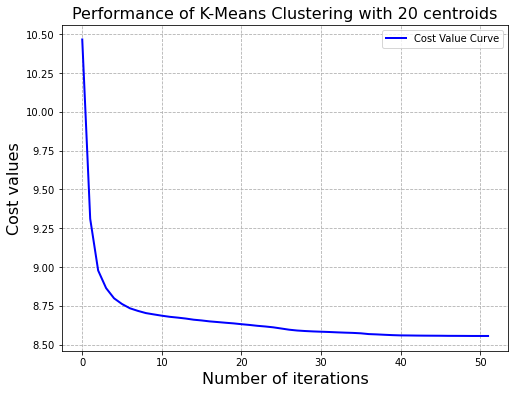

In [107]:
fig = plt.figure(figsize=(8,6))

# set first axis
ax = fig.subplots(1, 1)
ax.plot(iter_num_list, cost_value_list, color='b', linewidth=2, label = 'Cost Value Curve')
ax.set_title("Performance of K-Means Clustering with {} centroids".format(K), fontsize=16)
ax.set_xlabel("Number of iterations", fontsize=16)
ax.set_ylabel("Cost values", fontsize=16)
ax.grid(linestyle='--')
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes);


#### 3.6.2. Elbow Parameter Selection <a id='section_362'></a>
To identify the optimal hyperparameter $K$, the Elbow method is applied. In the following code block, we try to test a list of $K$ from 1 to 100 with step 5. This part requires aproximately 8-10 minutes depending on your hardware.

In [108]:
# Elbow testing
max_iter_counts = 100
tested_K = range(1, 100, 5)
threshold = 0.001
iter_counts = 1
K_performance = np.zeros((len(tested_K), iter_counts))
for idx, centroid_num in enumerate(tested_K):
    print("Centroid Number: {}".format(centroid_num))
    for count in range(iter_counts):
        # initialize centroids
        centroid_list = sample_centroid(data, centroid_num)
        # K-means iterations
        for _ in range(max_iter_counts):
            # assign data to centroid groups
            group_labels = kmeans_cluster(data, centroid_list)
            # compute new centroid
            new_centroid_list = compute_centroid(data, group_labels, centroid_num)
            # centroid change distance
            centroid_diff = compute_centroid_variation(new_centroid_list, centroid_list)
            cost_value = compute_cost(data, group_labels, new_centroid_list)
            centroid_list = new_centroid_list
            if centroid_diff < threshold:
                break
        K_performance[idx, count] = cost_value
        print("Final performance: {}".format(cost_value))

Centroid Number: 1
Final performance: 18.00000000000001
Centroid Number: 6
Final performance: 11.857743483654302
Centroid Number: 11
Final performance: 9.959652366602663
Centroid Number: 16
Final performance: 9.041288000026938
Centroid Number: 21
Final performance: 8.58702539186301
Centroid Number: 26
Final performance: 8.058925470378833
Centroid Number: 31
Final performance: 7.784982248442894
Centroid Number: 36
Final performance: 7.463831593962068
Centroid Number: 41
Final performance: 7.266133755664553
Centroid Number: 46
Final performance: 7.049991291340039
Centroid Number: 51
Final performance: 6.846443313715458
Centroid Number: 56
Final performance: 6.601259828549174
Centroid Number: 61
Final performance: 6.461226978981114
Centroid Number: 66
Final performance: 6.314396830483609
Centroid Number: 71
Final performance: 6.295508243007299
Centroid Number: 76
Final performance: 6.109951033252476
Centroid Number: 81
Final performance: 6.026939705766415
Centroid Number: 86
Final perform

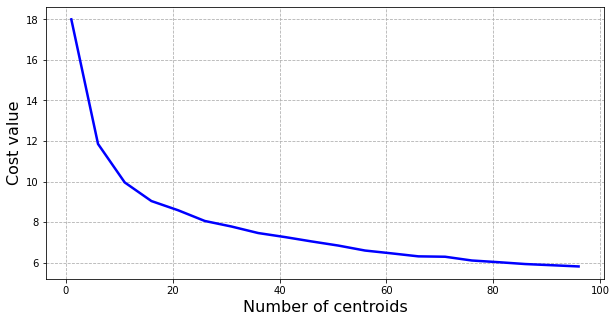

In [109]:
plt.figure(figsize=(10,5))
plt.plot(list(tested_K), np.mean(K_performance, axis=1), linewidth=2.5, color='b');
plt.grid(linestyle='--')
plt.xlabel("Number of centroids", fontsize=16);
plt.ylabel("Cost value", fontsize=16);

## 4. Hierarchical Clustering <a id='section_4'></a>
In this section, your task is to implement a hierarchical clustering algorithm. In particular, we will focus on the **agglomerative clustering** algorithm. After clustering, a dendrogram will be generated to show the structure of clustering results. 
### 4.1. Clustering Node <a id='section_41'></a>

**Task 7:** <a id='task_7'></a> The first task in this section is to construct the basic data structure of the tree of hierarchical clustering. You should:

1. assign the inputs to their corresponding attritubes including "self.data", "self.left", "self.right", "self.distance", "self.node_id", "self.count". (6 lines)

In [110]:
class Node(object):
    def __init__(self, data, left=None, right=None, distance=-1, node_id=None, count=1):
        """
        :param data: data items
        :param left: left node
        :param right: right node
        :param distance: distance between left and right nodes 
        :param id: node identifier
        :param count: number of leaf nodes
        """
        # task 7:
        # ====================== START YOUR CODE HERE ======================
        self.data = data
        self.left = left
        self.right = right
        self.distance = distance
        self.node_id = node_id
        self.count = count
        # ====================== END YOUR CODE HERE ========================

### 4.2. Single Linkage <a id='section_42'></a> 

**Task 8:** <a id='task_8'></a>

To evaluate the distance of two data clusters, the single linkage is used and the distance of two clusters $A$ and $B$ is defined as follows:
$$d(A, B) = \min (d(A_i, B_j)) \ , \tag{3}$$
where $A_i$ and $B_j$ are the data element in clusters $A$ and $B$, respectively. Your task here is to implement the function `single_linkage()`. In detail, you should: 

#### Task 8(A)
1. You should calculate the distances of all possible data pair between cluster A and B. In each iteration, you need to first compute the vector difference between two data items "data_i" and "data_j" in different clusters. Please save the result in "delta_vec". (1 line)
2. you should use function `np.linalg.norm()` to compute the norm of "delta_vec", which represents the distance between two data items. Please save the result in "distance_matrix" with the correct index. (1 line)

#### Task 8(B)
3. get the minimal distance value from the obtained distance matrix with function `np.min()`. (1 line)

In [111]:
def single_linkage(data_A, data_B):
    """
        - data_A: data of cluster A
        - data_B: data of cluster B
    """
    distance_matrix = np.zeros((data_A.shape[0], data_B.shape[0]))
    for idx_1, data_i in enumerate(data_A):
        for idx_2, data_j in enumerate(data_B):
            # task 8(A):
            # ====================== START YOUR CODE HERE ======================
            delta_vec = data_i-data_j
            distance_matrix[idx_1, idx_2] = np.linalg.norm(delta_vec)
            # ====================== END YOUR CODE HERE ========================
    # task 8(B):
    # ====================== START YOUR CODE HERE ======================
    min_distance = np.min(distance_matrix)
    # ====================== END YOUR CODE HERE ========================
    
    return min_distance

**[Test Block 6]:** Test code for function `single_linkage()`.

In [112]:
# sampled data
sample_data_A = data[:10]
sample_data_B = data[10:20]

# test implemented code
distance = single_linkage(sample_data_A, sample_data_B)

# centroid difference output
print("Single Linkage between A and B: {}".format(distance))

# you can use function "numpy.allclose" to compare two floats with small differences.
if np.allclose(distance, 1.9158793481582326):
    print('Your answers are correct!')
else:
    print('Your answers are not correct, please correct the funtion codes.')

Single Linkage between A and B: 1.9158793481582326
Your answers are correct!


### 4.3. Hierarchical Structure Generation <a id='section_43'></a>
**Task 9:** <a id='task_9'></a> In this section, your task is to construct the tree of hierarchical clustering by the function `hierarchical_cluster()`. In detail, you will: 
 
#### Task 9(A): 
In each iteration of `while` statement, the first "for-loop" aims to get the the node pairs with minimal distance. You should: 
1. extract the "node_id" of two nodes and combine them in a `tuple` with bracket like `(a, b)` where `a` and `b` are data items. Please save the result in "d_key". (1 line)
2. extract the feature data of two clusters and save them in "data_i" and "data_j", respectively. (2 lines)
3. compute the distance between "data_i" and "data_j" with your implemented function `single_linkage()` (1 line)
4. save the distance result in the matrix "distances". (1 line)
5. compare the "dist" with "min_dist" and update the minimal distance "min_dist" and closest key pair "closest_part". (2 lines)
6. save the data pair with minimal distance in "closest_part". (1 line)

#### Task 9(B): 
When you get the data pair with minimal distance among all data items, the next task is to construct the new cluster node based on these two nodes. The feature data of two nodes should be saved together in the new node. You should:

1. stack the data vertically with function [`np.vstack()`](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html) and save the result in "new_data". For example, if data A and B has the shape of (3, 18) and (5, 18). The resulting shape will be (3+5, 18) = (8, 18). (1 line)
2. construct the new node based on the two selected nodes. You should: (5 lines)
    * assgin "new_data" to the input "data"
    * assign the two nodes to the inputs "left" and "right"
    * assign the minimal distance to the input "distance"
    * assign "currentclustid" to "node_id"
    * assgin the sum of counts of two nodes to the input "count"

In [120]:
def hierarchical_cluster(data, k):
    """
        - data: continuous features
        - k: number of centroids
    """
    # separate data
    data_num = data.shape[0]
    linkage_matrix = None
    # initialize nodes
    nodes = [Node(data=data_tuple, node_id=idx) for idx, data_tuple in enumerate(data)]
    distances = dict()
    currentclustid = data_num
    while len(nodes) > k:
        min_dist = np.Inf
        nodes_len = len(nodes)
        closest_part = None
        # construct the distance map
        for i in range(nodes_len - 1):
            for j in range(i + 1, nodes_len):
                # task 9(A):
                # ====================== START YOUR CODE HERE ======================
                d_key = tuple([nodes[i].node_id, nodes[j].node_id])
                if d_key not in distances:
                    data_i = nodes[i].data
                    data_j = nodes[j].data
                    dist = single_linkage(data_i, data_j)
                    distances[d_key] = dist
                
                dist = distances[d_key]
                if dist < min_dist:
                    min_dist = dist
                    closest_part = [i, j]
                # ====================== END YOUR CODE HERE ========================
        # merge two nearest nodes
        idx_1, idx_2 = closest_part
        node1, node2 = nodes[idx_1], nodes[idx_2]
        data_1 = node1.data
        data_2 = node2.data
        # task 9(A):
        # ====================== START YOUR CODE HERE ======================
        new_data = np.vstack((data_1, data_2))
        new_node = Node(new_data)
        new_node.left, new_node.right = node1, node2
        new_node.distance = min_dist
        new_node.node_id = currentclustid
        new_node.count = node1.count+node2.count
        # ====================== END YOUR CODE HERE ========================
        linkage_row = np.array([node1.node_id, node2.node_id, min_dist, new_node.count], ndmin=2)
        if linkage_matrix is None:
            linkage_matrix = linkage_row
        else:
            linkage_matrix = np.concatenate((linkage_matrix, linkage_row), axis=0)
        currentclustid += 1
        del nodes[idx_2], nodes[idx_1] # you have to delete the larger one first
        nodes.append(new_node)
    
    return nodes, linkage_matrix, distances

### 4.4. Hierarchical Clustering<a id='section_44'></a>
After all implementations of necessary functions, you will test the hierarchical clustering algorithm with part of the dataset. Here, only the first 500 data items are used for evaluation and visualizing the performance. This part requires aproximately 5-7 minutes depending on your hardware.

In [121]:
sample_data = data[0:500]
hierarchical_nodes, linkage_matrix, distances = hierarchical_cluster(sample_data, 1)

### 4.5. Dendrogram <a id='section_45'></a>
The Dendrogram is here to show the structure of clustering results. The x-axis of the following figure represents the indices of data items, while the y-axis represents the distance values (computed by `single_linkage()`) between cluster pairs. 

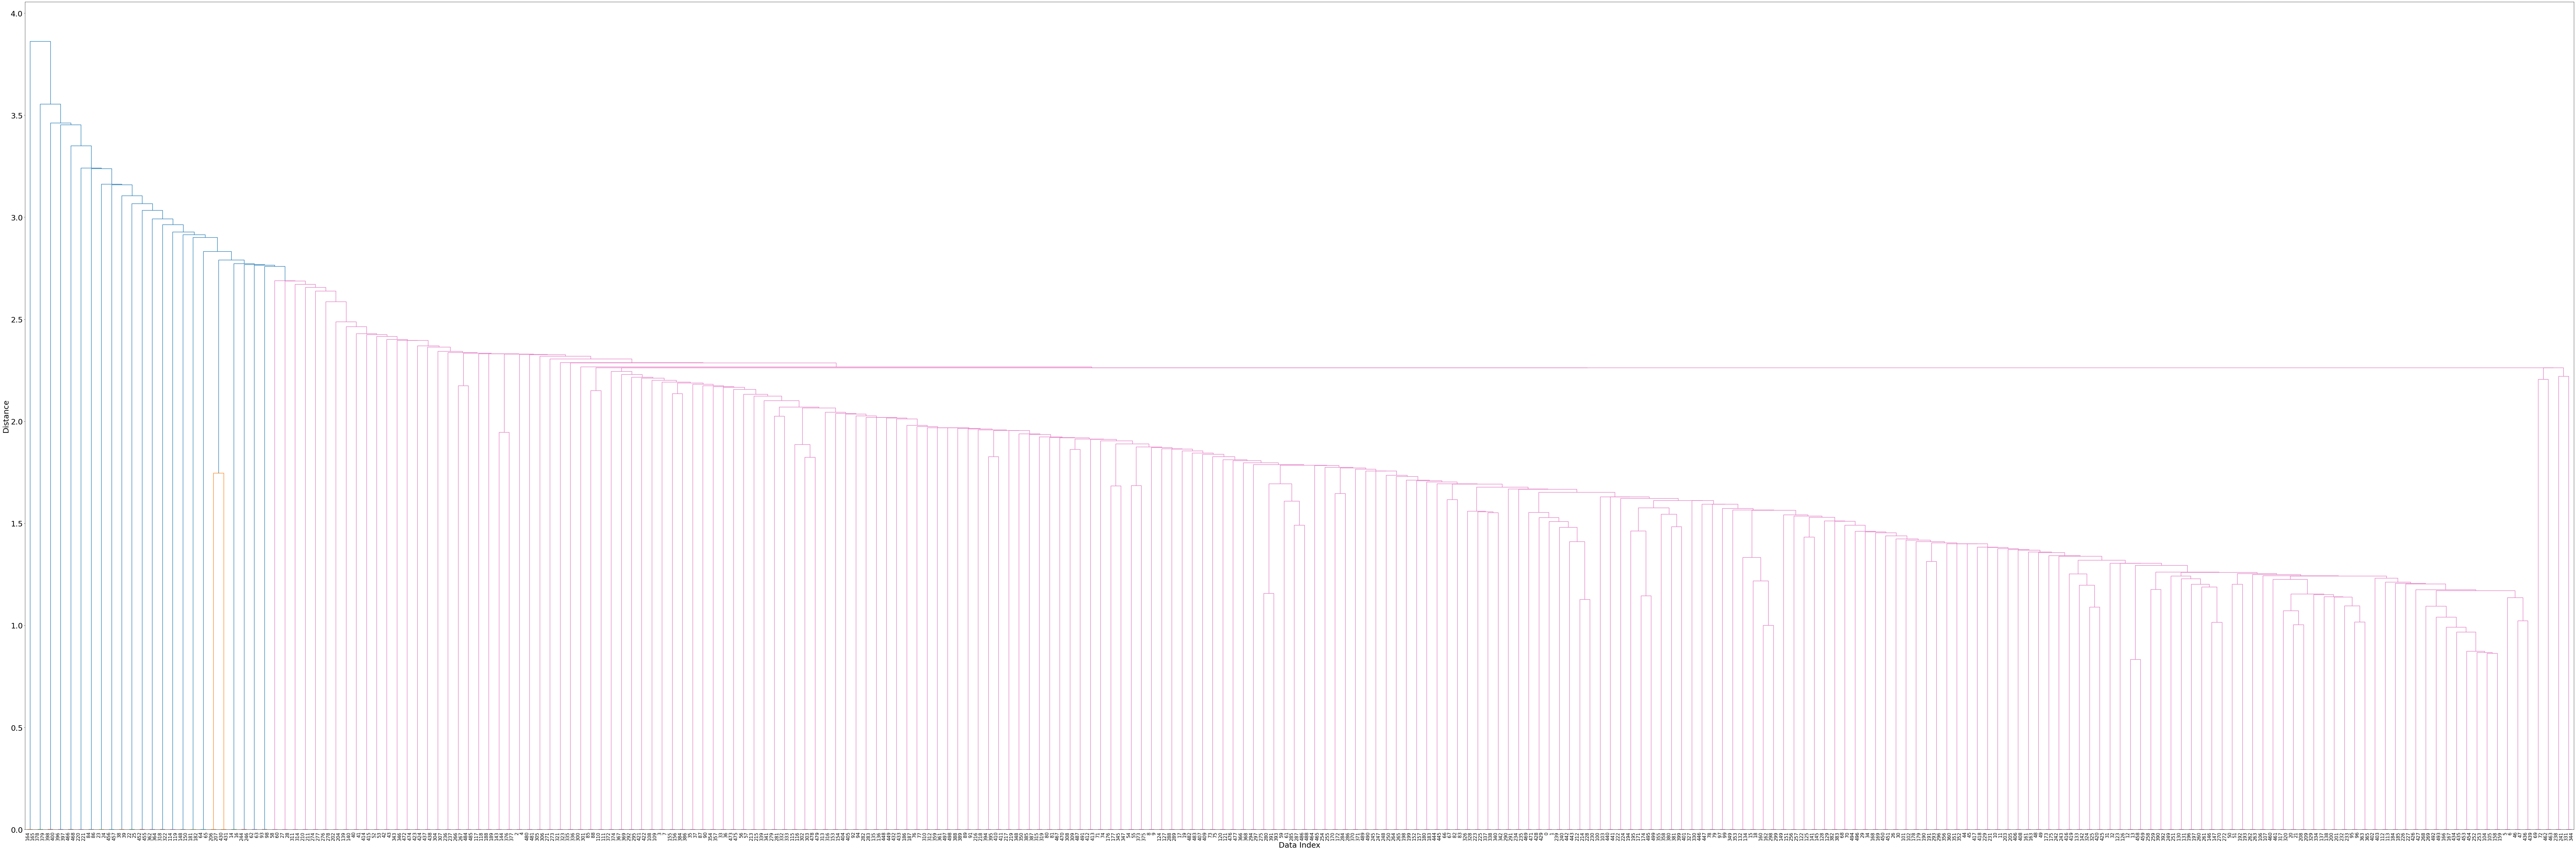

In [122]:
fig = plt.figure(figsize=(150, 50))
ax = fig.subplots(1, 1)
dendrogram(linkage_matrix, leaf_font_size=15, ax=ax)
ax.set_xlabel("Data Index", fontsize=25)
ax.set_ylabel("Distance", fontsize=25)
plt.yticks(fontsize=25)
plt.show()

## 5. Marking Scheme and Submission <a id='section_5'></a>

This part carries 50% of the assignment grade. Part B (reinforcement learning) carries 30%.The Quiz posted on Moodle carries 20%. Late submission will incur a 30% deduction. The marking scheme of this part follows.

**Task Summary**

| Task | Grade Points 
|:----|:----:         
| 1. Centroid Initialization ([`sample_centroid()`](#task_1)) | 3
| 2. K-Means Clustering ([`kmeans_cluster()`](#task_2)) | 3
| 3. Centroid Calculation ([`compute_centroid()`](#task_3)) | 4
| 4. Centroid Variation Evaluation ([`compute_centroid_variation()`](#task_4)) | 6
| 5. Cost Computation ([`compute_cost()`](#task_5)) | 8
| 6. [K-Means Performance Testing](#task_6) | 8
| 7. Cluster Node ([`Node()`](#task_7)) | 6
| 8. Single Linkage ([`single_linkage()`](#task_8)) | 4
| 9. Hierarchical Structure Generation ([`hierarchical_cluster()`](#task_9)) | 8
| **TOTAL** | **50**

### Submission
You are required to upload to Moodle a zip file containing the following files.

1. Your completed Jupyter Notebook of this part. Please rename your file as `A3A_[SID]_[FirstnameLastname].ipynb` (where `[SID]` is your student ID and `[FirstnameLastname]` is your first name and last name concatenated) and do not include the data file. You must complete the **Acknowledgment** section in order for the file to be graded.
2. The PDF version (.pdf file) of your completed notebook (click `File > Download as > PDF via HTML` (If error occurs, you may download it as HTML and then save the HTML as PDF separately)).

In addition, please complete **A3Q: Assignment 3 -- Quiz** separately on the Moodle site.

## 6. Summary <a id='section_6'></a>
Congratulations! You have implemented your K-Means clustering and hierarchical clustering algorithm in this course! 

To summarize, you have implemented the basic data structure "Node" of hierarchical clustering, centroid initialization, centroid calculation, centroid variation evaluation, cost computation, Elbow parameter selection, single linkage, hierarchical structure generation. You have run the algorithm to identify the optimal K-Means and hierarchical clusterin model using the continuous features of dataset and applied the model to group the types of sampled data.